# Serena Emotion Detector - Evaluation Notebook

This notebook is to evaluate our trained `serena-emotion-detector` model.

## Setup


In [15]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [16]:
model = tf.keras.models.load_model(
    "../../deploy/model/serena-emotion-detector.keras"
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

## How to Predict Emotions

We first need to pre-process our image to fit the model with these steps:
1. Convert image to grayscale
2. Detect the face in the image
3. Crop the image of the user's face
4. Resize the image to 224
5. Normalize our image
6. Pass it to our model

Setup our variables

In [17]:
classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
img_size = 224

# Detect faces
faceCascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

test_image_folder = "../../deploy/test/images"

Convert image to grayscale

(179, 282, 3)


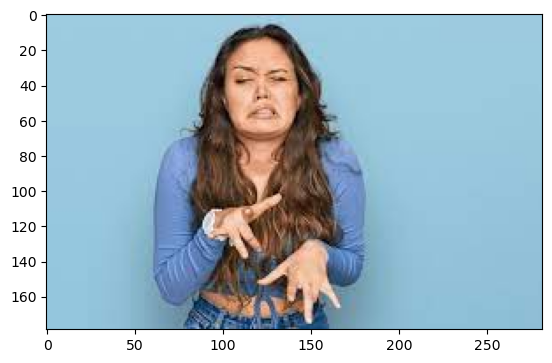

In [19]:
example_image_path = os.path.join(test_image_folder, "disgust.jpg")
example_image = cv2.imread(example_image_path)
print(example_image.shape)
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))

(179, 282)


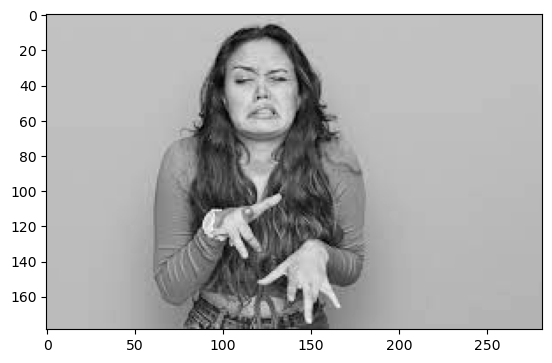

In [20]:
gray = cv2.cvtColor(example_image, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')

Detect the face in the image

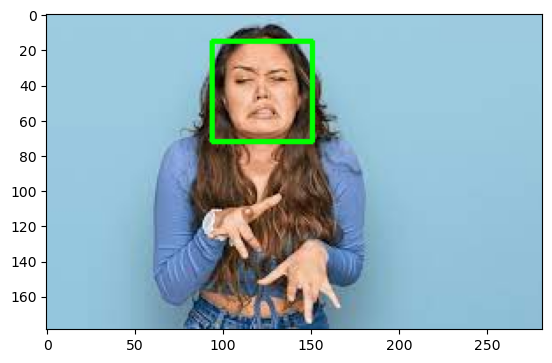

In [21]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in faces:
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = example_image[y:y + h, x:x + w]
    cv2.rectangle(example_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    faces = faceCascade.detectMultiScale(roi_gray)
    if len(faces) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in faces:
            face_roi = roi_color[ey:ey + eh, ex:ex + ew]
plt.imshow(cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB))

Crop the face

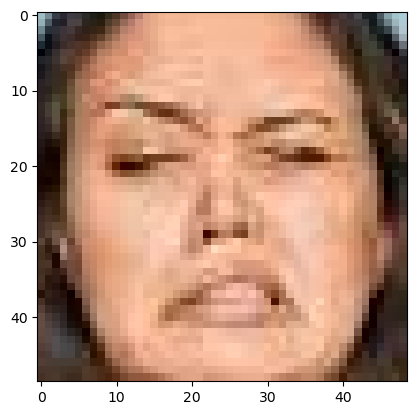

In [22]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

Resize the image to 224

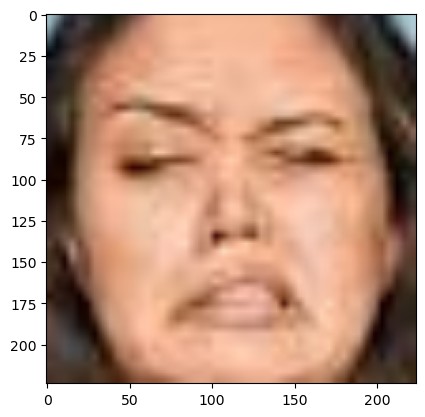

In [23]:
example_image = cv2.resize(face_roi, (img_size, img_size))
example_image = np.expand_dims(example_image, axis=0) 
plt.imshow(cv2.cvtColor(example_image[0], cv2.COLOR_BGR2RGB))

Normalize image for prediction

In [24]:
processed_image = example_image / 255.0

Predict emotion from face image

1/1 [==============================] - 4s 4s/step
[1.2123738e-03 9.9463165e-01 4.0836656e-03 1.4721066e-06 9.0725689e-07
 6.6168592e-05 3.8626117e-06]
Main Emotion: disgust
angry: 0.12%
disgust: 99.46%
fear: 0.41%
happy: 0.00%
neutral: 0.00%
sad: 0.01%
surprise: 0.00%


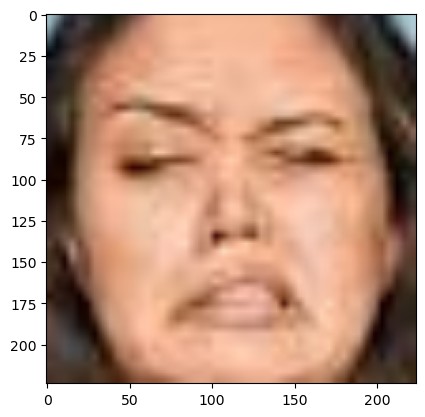

In [25]:
plt.imshow(cv2.cvtColor(example_image[0], cv2.COLOR_BGR2RGB))
predictions = model.predict(processed_image)
print(predictions[0])
print("Main Emotion: " + str(classes[np.argmax(predictions[0])]))

result = {}
for i, label in enumerate(classes):
    percentage = predictions[0][i] * 100
    result[label.lower()] = percentage
    print("{}: {:.2f}%".format(label, percentage))

## Evaluate Model


In [54]:
# TODO tambah kode untuk evaluasi model untuk plot akurasi & loss

## Evaluate Images


Use the cells below to try out other images. The `predict_face` function does all of the previous steps in one function.

In [26]:
def predict_face(file_path):
    frame = cv2.imread(file_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        roi_gray = gray[y : y + h, x : x + w]
        roi_color = frame[y : y + h, x : x + w]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            raise ValueError("Face not detected")
        else:
            for ex, ey, ew, eh in faces:
                face_roi = roi_color[ey : ey + eh, ex : ex + ew]

    final_image = cv2.resize(face_roi, (img_size, img_size))
    final_image = np.expand_dims(final_image, axis=0)
    plt.imshow(cv2.cvtColor(final_image[0], cv2.COLOR_BGR2RGB))
    final_image = final_image / 255.0
    predictions = model.predict(final_image)

    print(predictions[0])
    print("Main Emotion: " + str(classes[np.argmax(predictions[0])]))

    result = {}
    for i, label in enumerate(classes):
        percentage = predictions[0][i] * 100
        result[label.lower()] = percentage
        print("{}: {:.2f}%".format(label, percentage))

### Main Emotions


1/1 [==============================] - 0s 73ms/step
[9.9755377e-01 1.6393574e-04 1.4243467e-03 8.5982356e-07 1.5735468e-05
 8.0378982e-04 3.7485152e-05]
Main Emotion: angry
angry: 99.76%
disgust: 0.02%
fear: 0.14%
happy: 0.00%
neutral: 0.00%
sad: 0.08%
surprise: 0.00%


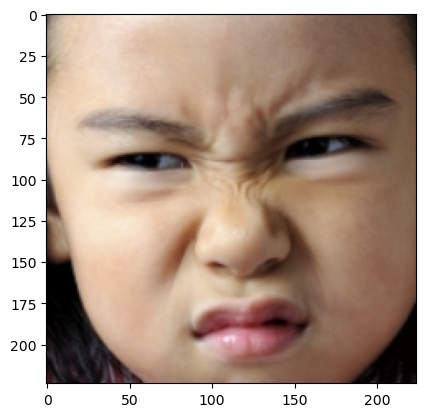

In [27]:
predict_face(os.path.join(test_image_folder, "angry.jpg"))

1/1 [==============================] - 0s 144ms/step
[1.2123738e-03 9.9463165e-01 4.0836656e-03 1.4721066e-06 9.0725689e-07
 6.6168592e-05 3.8626117e-06]
Main Emotion: disgust
angry: 0.12%
disgust: 99.46%
fear: 0.41%
happy: 0.00%
neutral: 0.00%
sad: 0.01%
surprise: 0.00%


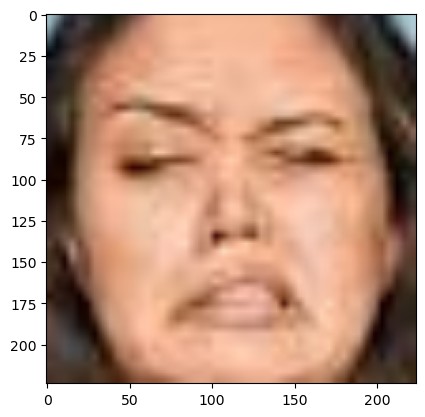

In [28]:
predict_face(os.path.join(test_image_folder, "disgust.jpg"))

1/1 [==============================] - 0s 97ms/step
[8.3537388e-04 6.8080840e-07 9.9891198e-01 3.0224019e-06 1.7696942e-06
 1.9438346e-04 5.2876334e-05]
Main Emotion: fear
angry: 0.08%
disgust: 0.00%
fear: 99.89%
happy: 0.00%
neutral: 0.00%
sad: 0.02%
surprise: 0.01%


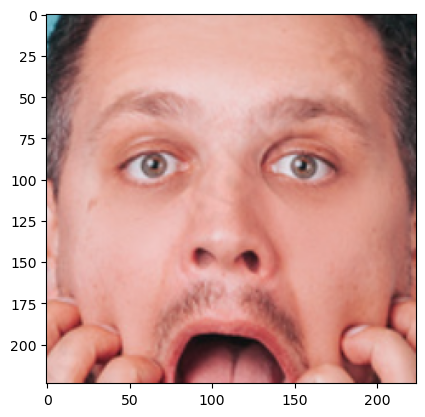

In [10]:
predict_face(os.path.join(test_image_folder, "fear.jpg"))

1/1 [==============================] - 0s 129ms/step
[7.6487964e-08 7.6293581e-12 5.2900332e-06 9.9992442e-01 5.4442506e-05
 7.2109674e-07 1.5104952e-05]
Main Emotion: happy
angry: 0.00%
disgust: 0.00%
fear: 0.00%
happy: 99.99%
neutral: 0.01%
sad: 0.00%
surprise: 0.00%


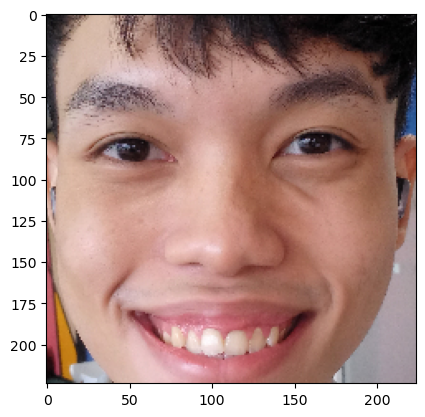

In [11]:
predict_face(os.path.join(test_image_folder, "happy.jpg"))

1/1 [==============================] - 0s 113ms/step
[6.8917009e-04 1.2210194e-06 6.9691153e-04 1.2483823e-04 9.9192953e-01
 6.5318639e-03 2.6493748e-05]
Main Emotion: neutral
angry: 0.07%
disgust: 0.00%
fear: 0.07%
happy: 0.01%
neutral: 99.19%
sad: 0.65%
surprise: 0.00%


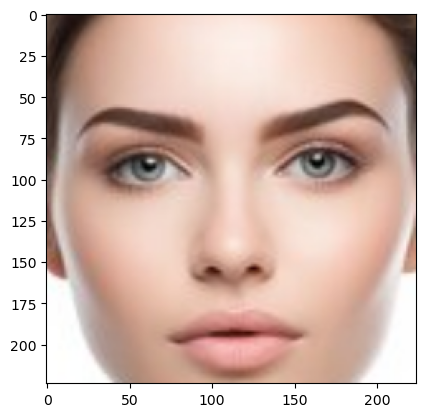

In [12]:
predict_face(os.path.join(test_image_folder, "neutral.jpg"))

1/1 [==============================] - 0s 85ms/step
[1.3772092e-03 8.1423121e-07 1.7825574e-01 2.5498948e-05 1.2653376e-03
 8.1907248e-01 2.9595194e-06]
Main Emotion: sad
angry: 0.14%
disgust: 0.00%
fear: 17.83%
happy: 0.00%
neutral: 0.13%
sad: 81.91%
surprise: 0.00%


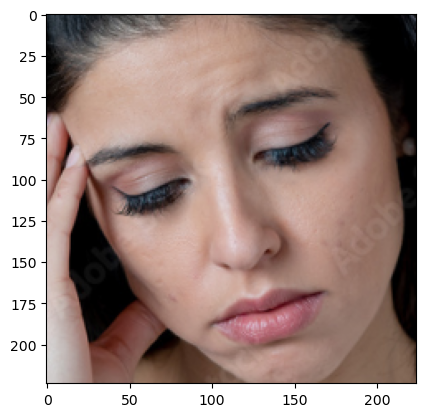

In [13]:
predict_face(os.path.join(test_image_folder, "sad.jpg"))

1/1 [==============================] - 0s 66ms/step
[1.1043811e-05 8.9773557e-06 5.7664054e-04 4.2309580e-07 9.5443138e-06
 8.5246889e-08 9.9939322e-01]
Main Emotion: surprise
angry: 0.00%
disgust: 0.00%
fear: 0.06%
happy: 0.00%
neutral: 0.00%
sad: 0.00%
surprise: 99.94%


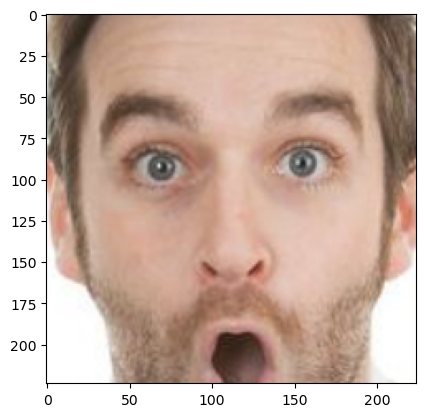

In [14]:
predict_face(os.path.join(test_image_folder, "surprise.jpg"))

### Mixed Emotions


1/1 [==============================] - 0s 95ms/step
[2.0295454e-03 3.3769367e-04 1.0462949e-01 7.8343824e-02 2.4698889e-02
 7.6939547e-01 2.0565135e-02]
Main Emotion: sad
angry: 0.20%
disgust: 0.03%
fear: 10.46%
happy: 7.83%
neutral: 2.47%
sad: 76.94%
surprise: 2.06%


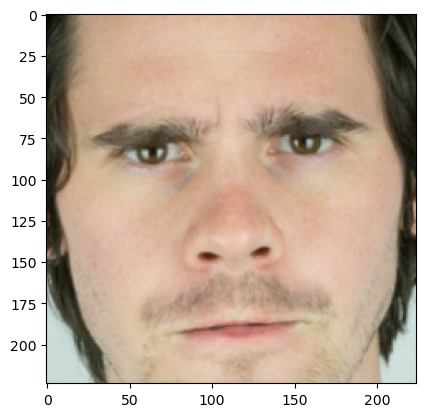

In [25]:
predict_face(os.path.join(test_image_folder, "example1.jpg"))

1/1 [==============================] - 0s 121ms/step
[8.8571047e-04 2.3573406e-07 4.6950588e-01 5.1549351e-01 6.3193620e-05
 2.4262636e-03 1.1625272e-02]
Main Emotion: happy
angry: 0.09%
disgust: 0.00%
fear: 46.95%
happy: 51.55%
neutral: 0.01%
sad: 0.24%
surprise: 1.16%


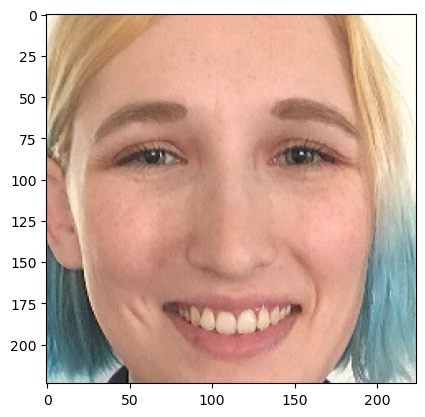

In [9]:
predict_face(os.path.join(test_image_folder, "example2.jpg"))

1/1 [==============================] - 0s 127ms/step
[7.2563395e-09 1.9201048e-06 1.1803847e-05 2.4944067e-04 1.4515572e-07
 2.8410938e-08 9.9973673e-01]
Main Emotion: surprise
angry: 0.00%
disgust: 0.00%
fear: 0.00%
happy: 0.02%
neutral: 0.00%
sad: 0.00%
surprise: 99.97%


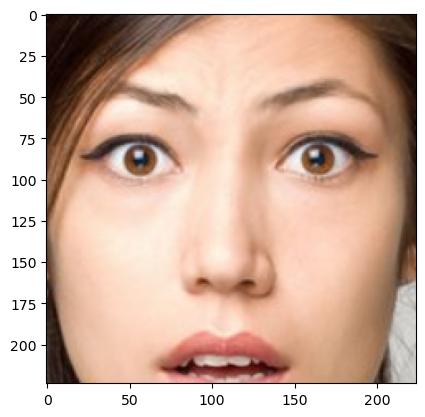

In [27]:
predict_face(os.path.join(test_image_folder, "example3.jpg"))

1/1 [==============================] - 0s 89ms/step
[1.3595717e-06 9.0091322e-05 2.9864651e-04 7.7864915e-02 8.1712083e-04
 2.9773419e-04 9.2063016e-01]
Main Emotion: surprise
angry: 0.00%
disgust: 0.01%
fear: 0.03%
happy: 7.79%
neutral: 0.08%
sad: 0.03%
surprise: 92.06%


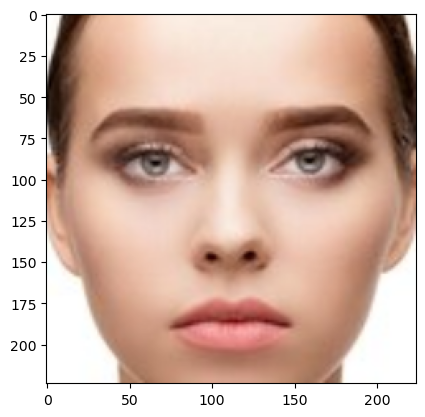

In [28]:
predict_face(os.path.join(test_image_folder, "example5.jpg"))

1/1 [==============================] - 0s 89ms/step
[1.08133449e-04 5.61356819e-06 5.29280491e-03 5.62534034e-01
 2.24480275e-02 1.17209056e-04 4.09494102e-01]
Main Emotion: happy
angry: 0.01%
disgust: 0.00%
fear: 0.53%
happy: 56.25%
neutral: 2.24%
sad: 0.01%
surprise: 40.95%


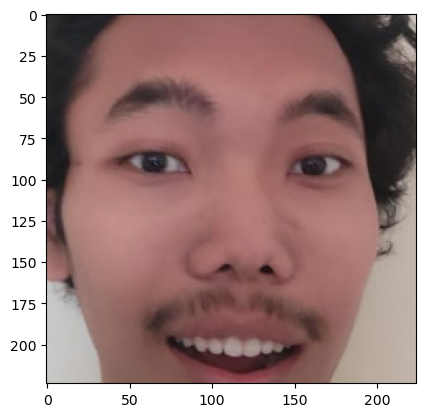

In [10]:
predict_face(os.path.join(test_image_folder, "example7.jpg"))

1/1 [==============================] - 0s 88ms/step
[1.3705539e-04 7.5483447e-05 4.2846687e-02 5.2177072e-01 7.3279880e-02
 2.2932796e-01 1.3256215e-01]
Main Emotion: happy
angry: 0.01%
disgust: 0.01%
fear: 4.28%
happy: 52.18%
neutral: 7.33%
sad: 22.93%
surprise: 13.26%


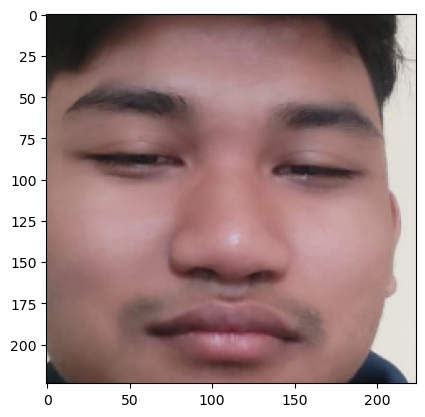

In [30]:
predict_face(os.path.join(test_image_folder, "example8.jpg"))

1/1 [==============================] - 0s 116ms/step
[2.7908352e-05 6.1926353e-09 2.6159193e-03 3.4962378e-02 9.2693543e-01
 9.4175967e-04 3.4516588e-02]
Main Emotion: neutral
angry: 0.00%
disgust: 0.00%
fear: 0.26%
happy: 3.50%
neutral: 92.69%
sad: 0.09%
surprise: 3.45%


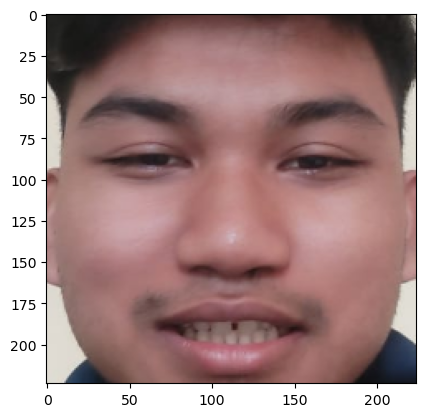

In [31]:
predict_face(os.path.join(test_image_folder, "example9.jpg"))

1/1 [==============================] - 0s 105ms/step
[8.8917930e-04 7.5932909e-03 1.2960854e-02 7.6008320e-02 5.8243325e-04
 1.0954191e-03 9.0087044e-01]
Main Emotion: surprise
angry: 0.09%
disgust: 0.76%
fear: 1.30%
happy: 7.60%
neutral: 0.06%
sad: 0.11%
surprise: 90.09%


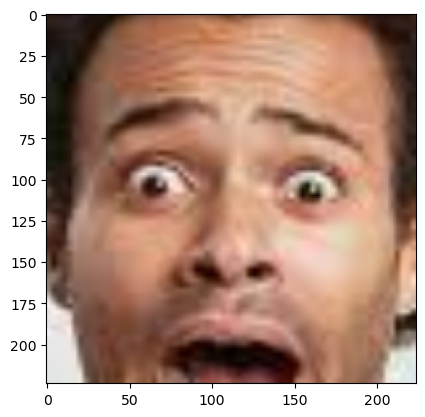

In [32]:
predict_face(os.path.join(test_image_folder, "surprised.jpg"))

## Realtime Evaluation

Use the code below to open your webcam and predict live.

In [29]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

# set the rectangle background to white
rectangle_bgr = (255, 255, 255)
# make a black image
img = np.zeros((500, 500))
# set some text
text = "Some text in a box!"
# get the width and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
# set the text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of the box with a small padding of two pixels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
x1, y1, w1, h1 = 0, 0, 175, 75

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    face_roi = frame

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        faces = faceCascade.detectMultiScale(roi_gray)
        if len(faces) == 0:
            print("Face not detected")
        else:
            for (ex, ey, ew, eh) in faces:
                face_roi = roi_color[ey:ey + eh, ex:ex + ew]

    final_image = cv2.resize(face_roi, (img_size, img_size))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image / 255.0 # normalizing the image

    predictions = model.predict(final_image)

    status = classes[np.argmax(predictions[0])]
    result = {}
    
    for i, label in enumerate(classes):
        percentage = predictions[0][i] * 100
        result[label.lower()] = percentage
        print("{}: {:.2f}%".format(label, percentage))

    # Draw black background rectangle
    cv2.rectangle(frame, (x1, x1), (x1+w1+50, y1+h1 * 3), (0,0,0), -1)
    # Add text
    # cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    # Show dictionary keys seperately
    cv2.putText(frame, "Angry: {:.2f}%".format(result["angry"]), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, "Disgust: {:.2f}%".format(result["disgust"]), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, "Fear: {:.2f}%".format(result["fear"]), (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, "Happy: {:.2f}%".format(result["happy"]), (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, "Neutral: {:.2f}%".format(result["neutral"]), (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, "Sad: {:.2f}%".format(result["sad"]), (10, 140), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    cv2.putText(frame, "Surprise: {:.2f}%".format(result["surprise"]), (10, 160), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    cv2.imshow("Face Emotion Recognition", frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 87ms/step
angry: 94.39%
disgust: 0.02%
fear: 1.90%
happy: 1.30%
neutral: 1.89%
sad: 0.44%
surprise: 0.06%
Face not detected
Face not detected
1/1 [==============================] - 0s 150ms/step
angry: 5.65%
disgust: 0.05%
fear: 1.10%
happy: 2.43%
neutral: 87.19%
sad: 2.21%
surprise: 1.38%
1/1 [==============================] - 0s 192ms/step
angry: 0.24%
disgust: 0.00%
fear: 0.54%
happy: 52.75%
neutral: 44.31%
sad: 1.36%
surprise: 0.80%
Face not detected
1/1 [==============================] - 0s 140ms/step
angry: 1.26%
disgust: 0.02%
fear: 1.43%
happy: 1.81%
neutral: 93.48%
sad: 1.48%
surprise: 0.52%
1/1 [==============================] - 0s 142ms/step
angry: 0.00%
disgust: 0.00%
fear: 2.66%
happy: 0.00%
neutral: 0.54%
sad: 96.80%
surprise: 0.00%
1/1 [==============================] - 0s 199ms/step
angry: 4.54%
disgust: 0.01%
fear: 2.17%
happy: 4.10%
neutral: 85.37%
sad: 2.63%
surprise: 1.17%
1/1 [==============================] - 0s 206ms/step